In [4]:
pip install openai


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install reportlab


  Obtaining dependency information for reportlab from https://files.pythonhosted.org/packages/7e/4b/f1d01a4e2712310ebb4715d38d01c5c72ce0fe27cc4540b9c1fd54a6d1df/reportlab-4.0.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 330.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.9 MB 363.1 kB/s eta 0:00:06
   --- ------------------------------------ 0.2/1.9 MB 756.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.9 MB 983.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.9 MB 1.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/1.9 MB 1.0 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/1.9 MB 1

In [2]:
import json
import openai

In [27]:

# Load api key from the config file
with open('C://Users//HP//OneDrive//Documents//OneDrive//Desktop//Audio//config.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
audio_file= open("C://Users//HP//OneDrive//Documents//OneDrive//Desktop//Audio//test15.mp3", "rb")
transcript = openai.Audio.transcribe(model="whisper-1", 
                                     file=audio_file,)
print(transcript.text)

Patient Name Liam Harris Date of Admission July 16, 2016 Medical Record Number 4567812 Subjective 28-year-old male presents with a chief complaint of persistent fatigue and unintentional weight loss over the past two months. He reports increased frequency of bowel movements, often with loose stools. Observation and Examination Physical examination reveals pallor and blood tests show iron deficiency, anemia. Inflammatory demonstrates multiple ulcerations in the colon. Assessment Inflammatory bowel disease, specifically ulcerative colitis. Plan Treatment will include a combination of anti-inflammatory medications and close monitoring. Dietary modifications will also be recommended. Attending Physician Dr. Grace Foster


In [28]:
# Load api key from the config file
with open('C://Users//HP//OneDrive//Documents//OneDrive//Desktop//Audio//config.json', 'r') as config_file:
    config_data = json.load(config_file)

openai.api_key = config_data.get("API_KEY")
form = "You are a text formatter for patient medical reports. Format the text as follows. Patient Name: , Date of Visit: , and Medical Record Number: in a separate line at the top of the page. Place <br/> after each entry. Then place <br/>\n. Create a heading called Subjective. Under this heading summarize the reason for the patient visit and the patient symptoms.  Create a second heading called Observation. Under this heading summarize the physical signs of the patient and any examination checking patient symptoms on the patient. Create a third heading called assessment. Summarize what the diagnosis is or what it is believed to be. List the summary in bullet points. Create a fourth heading called Plan.  Summarize the treatment options for the patient. Put each heading: Subjective, Observation, Assessment and Plan between <br/><br/>:\n, for example, <br/>Subjective<br/>:\n Before and after each bullet point place <br/>. A bullet point is represented when an hyphen starts the sentence. Create a final heading called Attending Physician: and place <br/> before it"
completion = openai.ChatCompletion.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": f"{form}"},
    {"role": "user", "content": f"{transcript.text}"}
  ],
    temperature=0
)
patientReport = completion.choices[0].message.content
print(patientReport)

Patient Name: Liam Harris<br/>
Date of Visit: July 16, 2016<br/>
Medical Record Number: 4567812<br/>
<br/>
<br/>Subjective<br/>
- 28-year-old male presents with a chief complaint of persistent fatigue and unintentional weight loss over the past two months.<br/>
- He reports increased frequency of bowel movements, often with loose stools.<br/>
<br/>
<br/>Observation<br/>
- Physical examination reveals pallor and blood tests show iron deficiency, anemia.<br/>
- Inflammatory demonstrates multiple ulcerations in the colon.<br/>
<br/>
<br/>Assessment<br/>
- Inflammatory bowel disease, specifically ulcerative colitis.<br/>
<br/>
<br/>Plan<br/>
- Treatment will include a combination of anti-inflammatory medications and close monitoring.<br/>
- Dietary modifications will also be recommended.<br/>
<br/>
<br/>Attending Physician: Dr. Grace Foster<br/>


In [29]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet

fileName = "tests/test15.pdf"
document = SimpleDocTemplate(fileName, pagesize=letter)

# Set margins (left, right, top, bottom)
left_margin = 50
right_margin = 50
top_margin = 50
bottom_margin = 50

# Define your content
content = []

sample_text = patientReport

# Create a paragraph style
styles = getSampleStyleSheet()
paragraph_style = styles['Normal']

# Add the text to the content list
content.append(Paragraph(sample_text, paragraph_style))

# Build the PDF document with margins and borders
document.build(content)

print(f"'{fileName}' created succefully.......")

'tests/test15.pdf' created succefully.......


# Whisper Model

# Approach

- Scaled to 680,000 hours of multilingual and multitask supervision (labeled audio data).

- It was designed to remove the need for any dataset-specific fine-tuning to achieve high-quality results.

- 117,000 hours of training audio covered 96 languages other than English.

- 125,000 hours of the dataset was dedicated to X -> en translation.

- Model achieves high results w/o need for self-supervision or self-training techniques.

- Models are trained to predict raw text from transcripts.

- Datasets are constructed from audio paired with transcripts on the Internet, resulting in a diverse dataset that encompasses a broad distribution of domains and languages.

- Several automated filtering methods are used to improve transcript quality from the raw dataset.

- Heuristics were developed to remove machine-created transcripts since many transcripts on the Internet are generated by ASR systems.

- An audio language detector was used . Created by fine-tuning a prototype model trained on prototyped dataset. If (audio,transcript) pair matched then it was used as a training example in the dataset for Whisper, otherwise it was removed, unless the transcript was in English it was used as a training example for the translation (X-> en) dataset.
- Audio files were broken into 30-second segments paired with the subset transcript of the corresponding audio segment.

- Whisper is trained entirely on audio datasets, including segments with no audio, and uses the segments as training data for voice activity detection.

# Model 

- Utilizes an encoder-decoder Transformer architecture (scales reliably).

- Audio is re-sampled to 16,000 Hz and a log-magnitude Mel spectrogram representation is computed. Essentially a log-magnitude Mel spectrogram captures the audio input, filters it, then compresses it for analysis.

- Input features are scaled between -1 and 1 for normalization.

- The encoder consists of two convolutional layers and the GELU activation function  processes the input.

- The final output from the input layer is also normalized.

- The encoder’s (reader)  objective is to understand each word in the given sentence. It pays keen attention to important words within the sentence to draw better context and semantics from it. It will then summarize what it has learnt and pass it on to the decoder (writer).

- The decoder will take the encoder’s summary and write a translated version of it, all while taking into consideration the original sentence, ensuring to keep its integrity (cross-attention). The decoder’s translation is then converted from numbers (tokens) to words.

- Positional encoding is utilized  to add special markers to each word to allow the computer ‘know’ the ordering in which words should appear in a sentence, for syntactic integrity.

- The multitasking training format is utilized to pass a sequence of tokens to the decoder, specifying the tasks to be performed. Tasks include: transcribing, translating, voice activity detection and language identification.


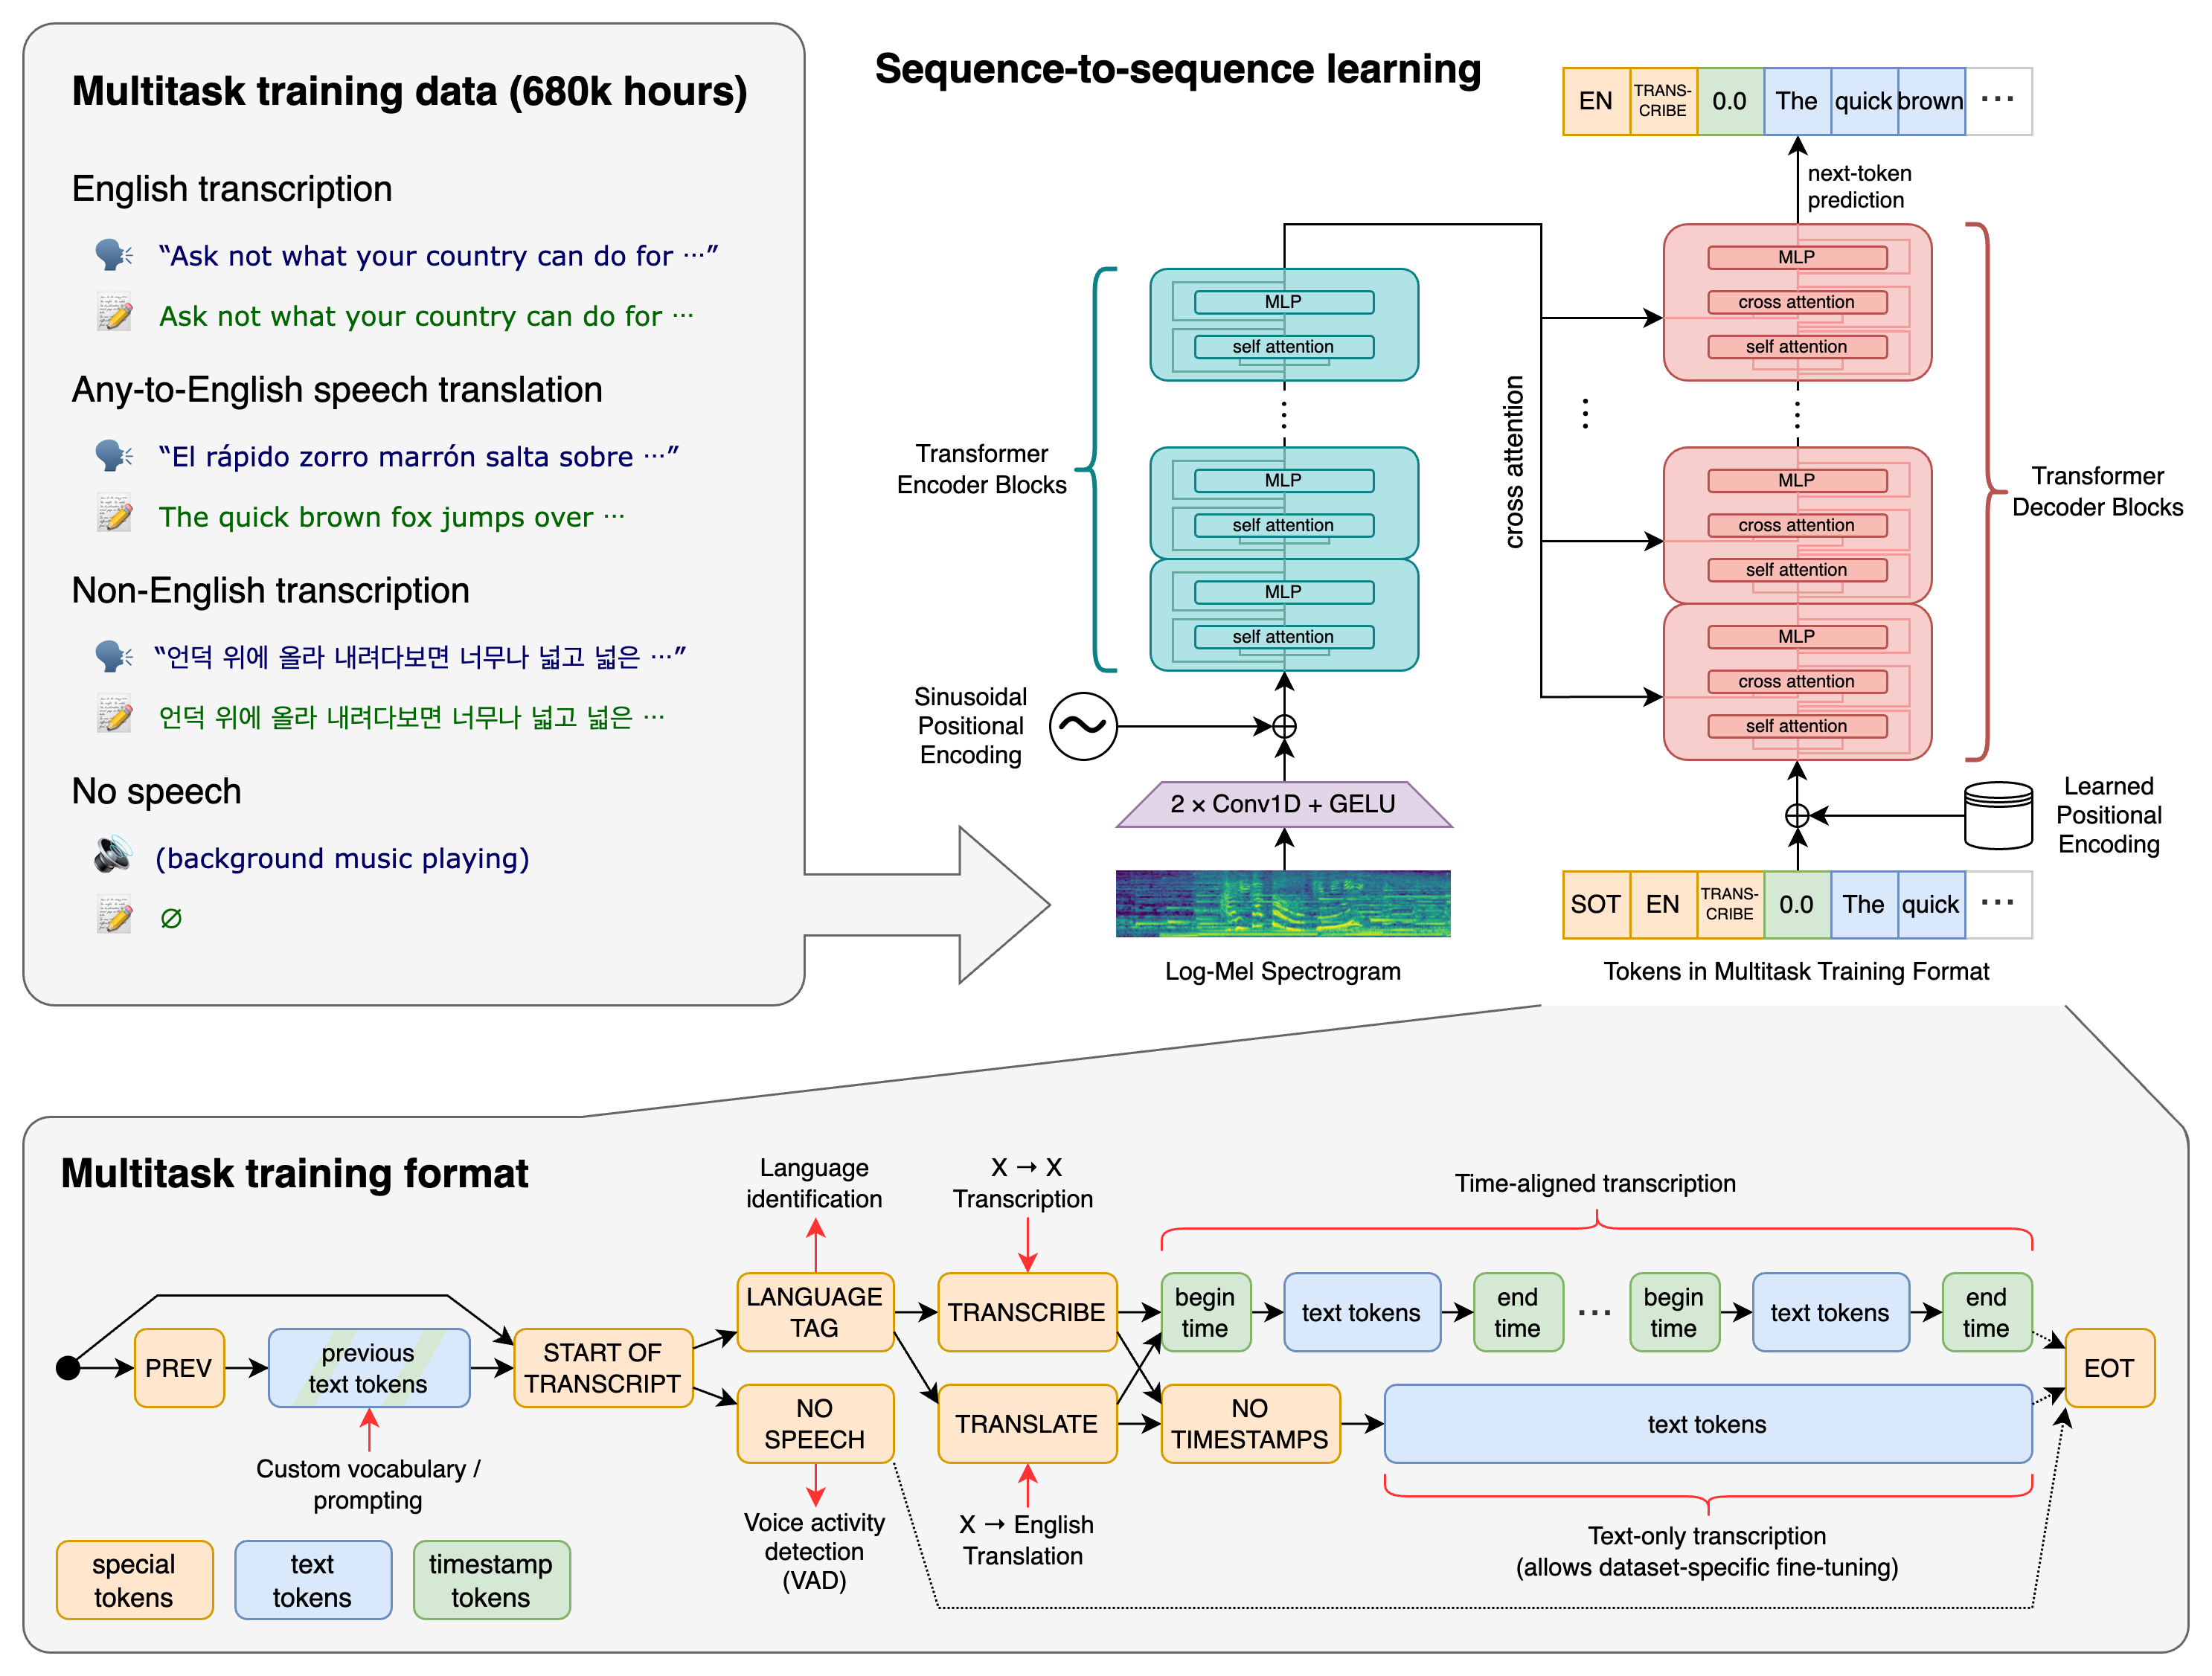

# Reference

Alec Radford, Jong Wook Kim, Tao Xu, Greg Brockman, Christine McLeavey, and Ilya Sutskever. 2023. Robust speech recognition via large-scale weak supervision. In Proceedings of the 40th International Conference on Machine Learning (ICML'23), Vol. 202. JMLR.org, Article 1182, 28492–28518.

# Implementation

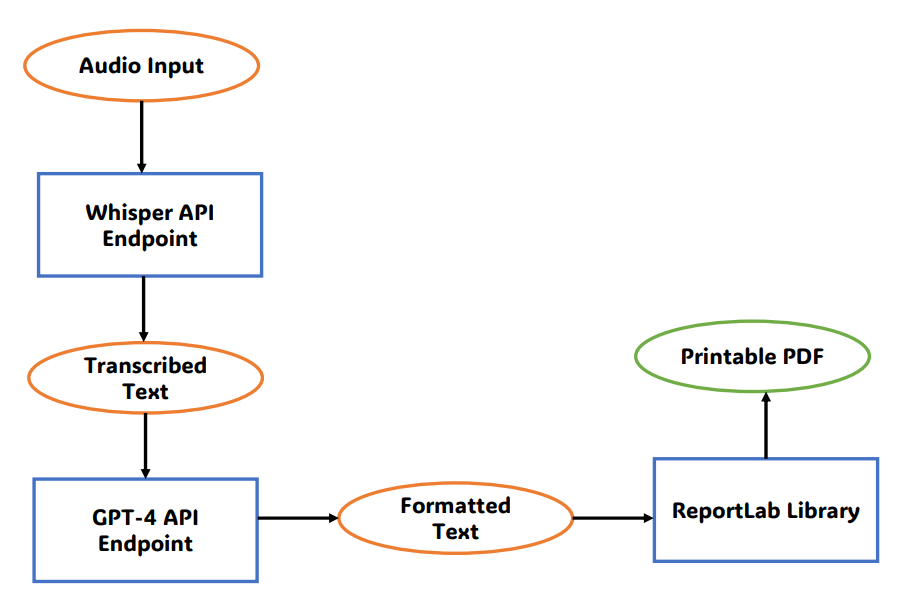

In [31]:
!git add -A

* master
